In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./data/2022-04-27.csv')
df = df.drop(columns=['Unnamed: 0','#']).rename(columns={"Country,Other":"Country"})
df.drop([0,1,2,3,4,5,6,7,236,237,238,239,240,241,242,243], inplace = True)
df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
8,China,207081,1824.0,4876.0,48.0,175431.0,3728.0,26774.0,318.0,144.0,...,1.600000e+08,111163.0,1.439324e+09,Asia,6951.0,295185.0,9.0,1.0,0.03,19.0
9,USA,82888247,57738.0,1019774.0,311.0,80585919.0,36051.0,1282554.0,1520.0,247777.0,...,1.003323e+09,2999223.0,3.345276e+08,North America,4.0,328.0,0.0,173.0,0.90,3834.0
10,India,43068799,3133.0,523693.0,39.0,42528126.0,2563.0,16980.0,698.0,30662.0,...,8.359741e+08,595150.0,1.404643e+09,Asia,33.0,2682.0,2.0,2.0,0.03,12.0
11,Brazil,30399004,20943.0,663165.0,224.0,29480998.0,69185.0,254841.0,8318.0,141191.0,...,6.377617e+07,296215.0,2.153034e+08,South America,7.0,325.0,3.0,97.0,1.00,1184.0
12,France,28483124,67711.0,145579.0,152.0,26403836.0,158622.0,1933709.0,1677.0,434619.0,...,2.664840e+08,4066235.0,6.553581e+07,Europe,2.0,450.0,0.0,1033.0,2.00,29506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,Niue,8,NaN,NaN,NaN,7.0,NaN,1.0,NaN,4860.0,...,NaN,NaN,1.646000e+03,Australia/Oceania,206.0,NaN,NaN,NaN,NaN,608.0
233,Nauru,4,1.0,NaN,NaN,3.0,NaN,1.0,NaN,365.0,...,NaN,NaN,1.094800e+04,Australia/Oceania,2737.0,NaN,NaN,91.0,NaN,91.0
234,Micronesia,3,NaN,NaN,NaN,1.0,NaN,2.0,NaN,26.0,...,NaN,NaN,1.172130e+05,Australia/Oceania,39071.0,NaN,NaN,NaN,NaN,17.0


In [3]:
sns.set_theme(style="whitegrid")

# Checking the distribution of (NewRecovered/ NewCases) ratio which determine the speed rate of approaching normal status of each country
- If this rate more over 1 => good rate, good sign
- If this rate closer to 0 => bad sign

In [4]:
df['to_normal_speed_rate'] = df['NewRecovered'].fillna(0)/df['NewCases'].fillna(0)

Text(0.5, 1.0, 'distribution of approach_to_normal rate (date:27.4.2022)')

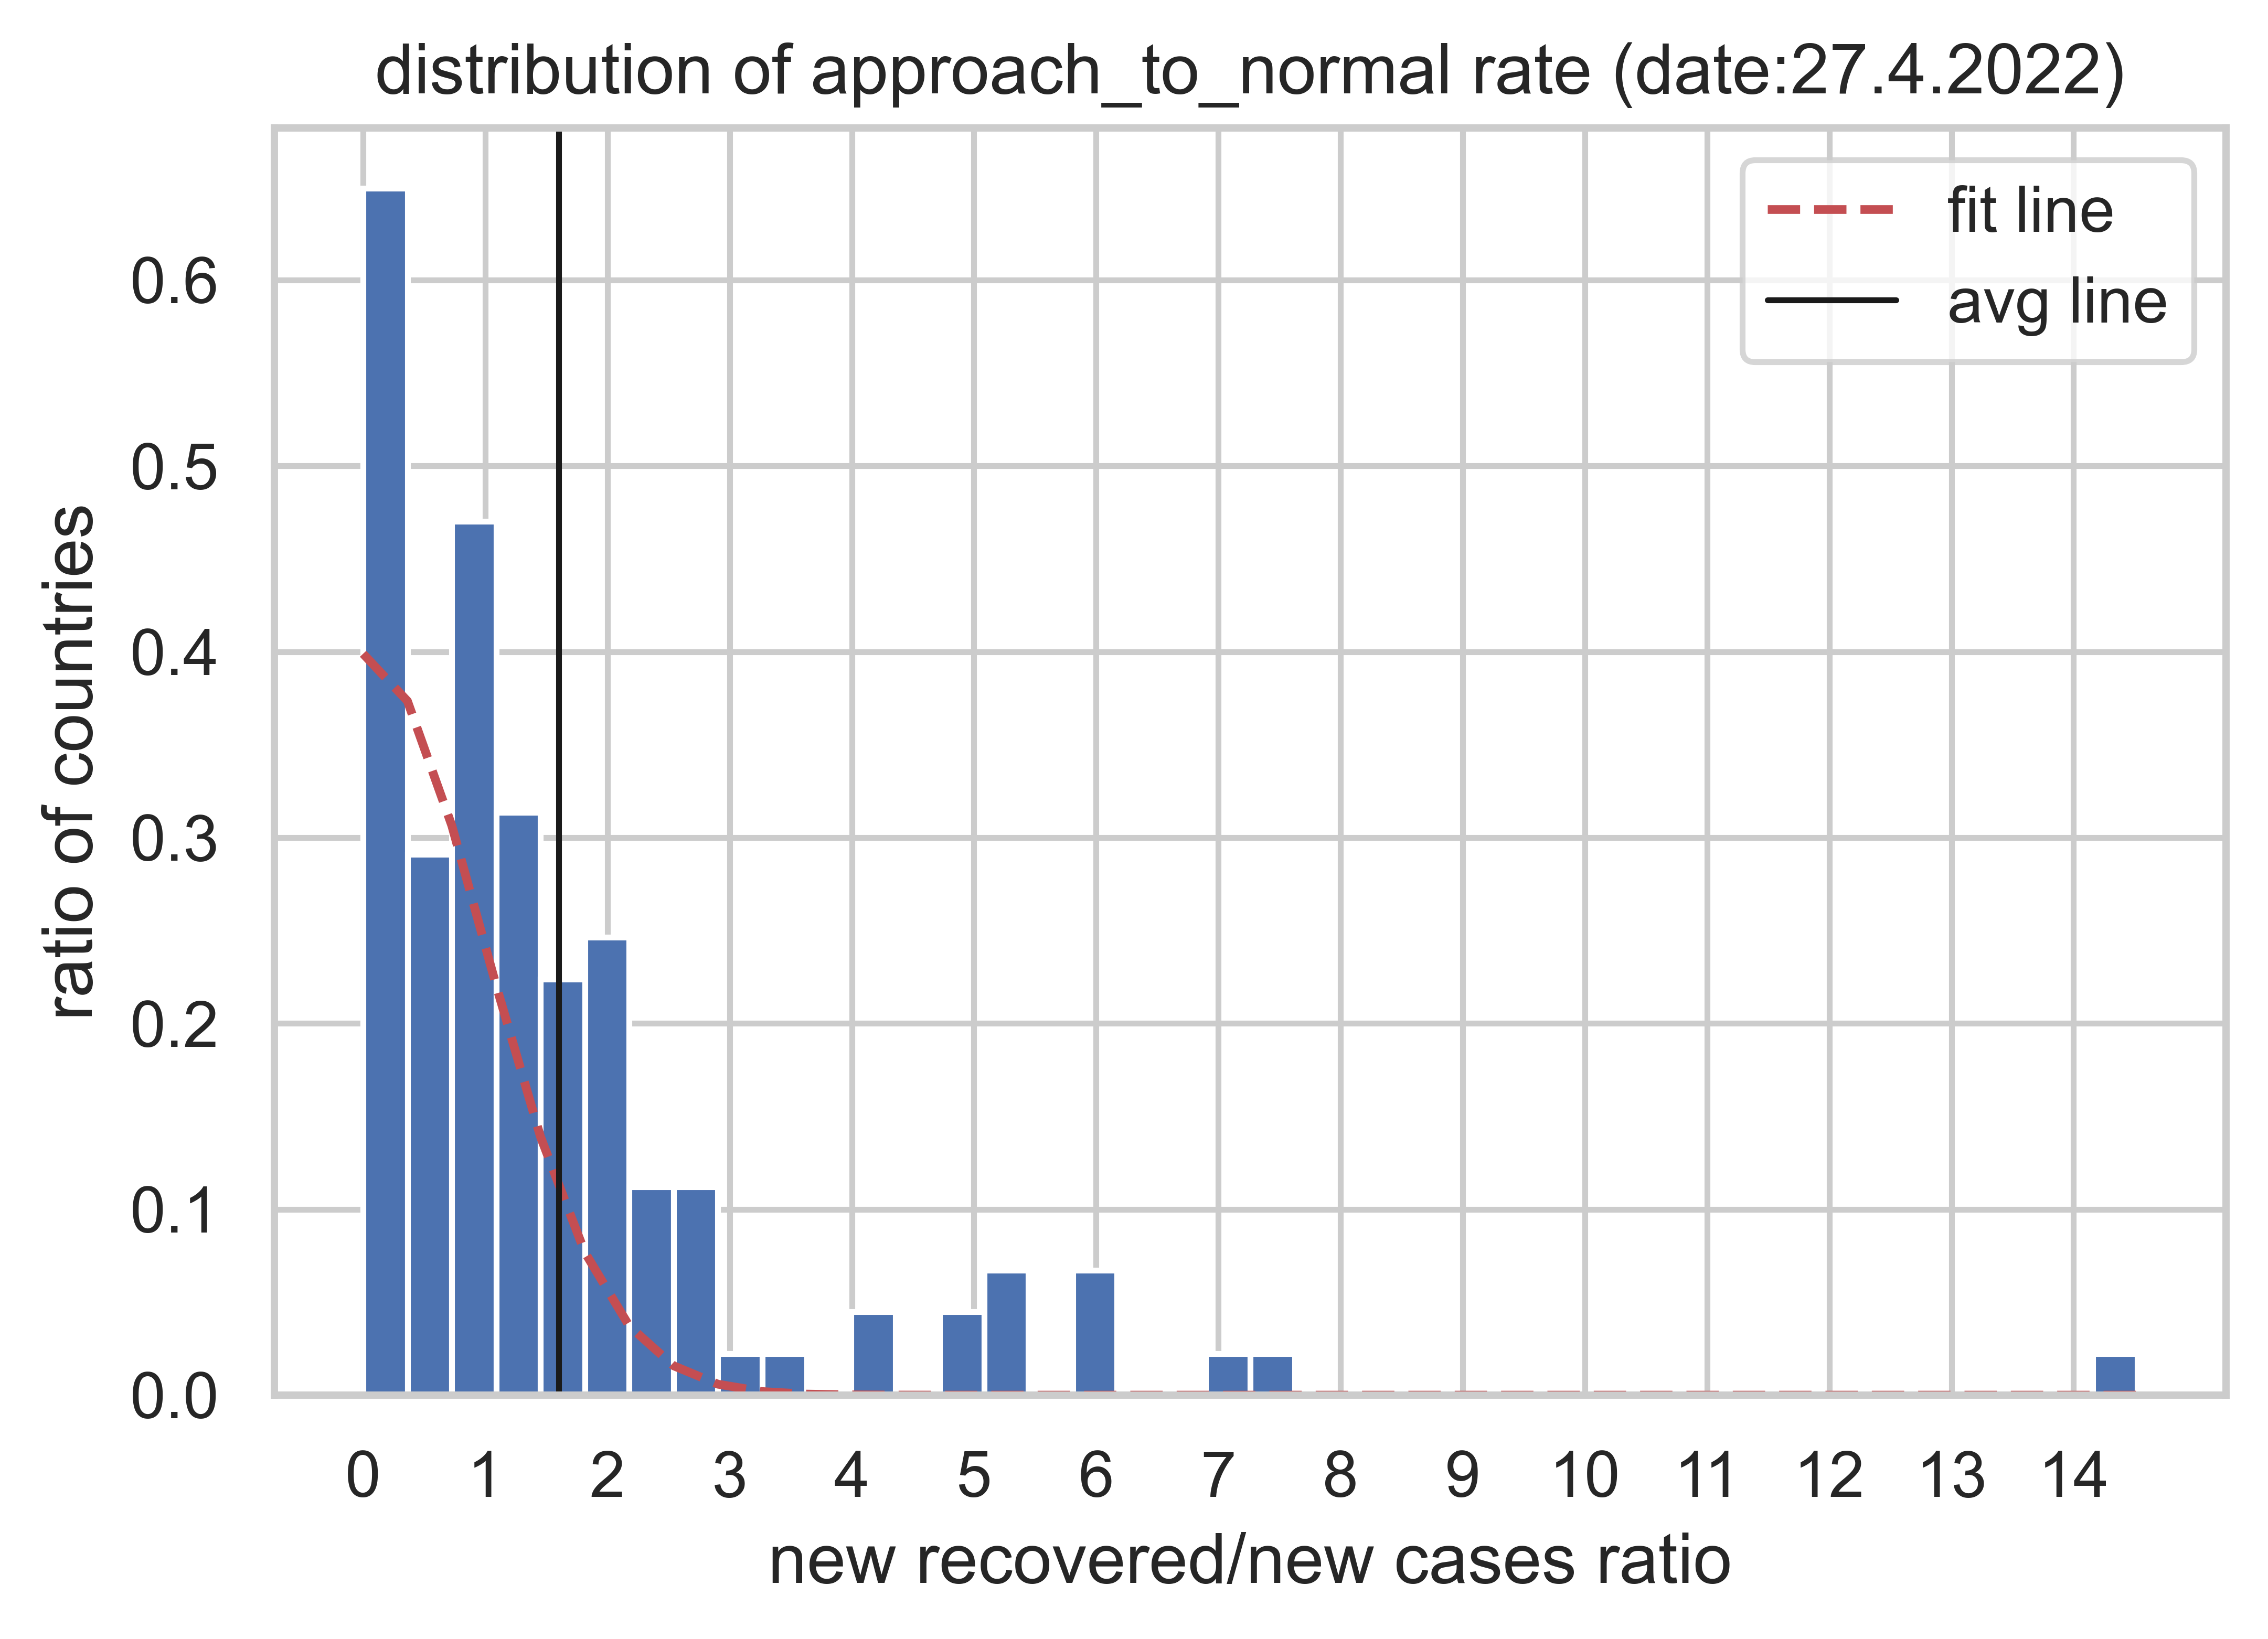

In [5]:
data = df[df['to_normal_speed_rate']!=np.inf]['to_normal_speed_rate'].dropna()

sigma = 1
mu = 0
fig, axe = plt.subplots(dpi=800)

n, bins, _ = axe.hist(data, bins=40, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

axe.plot(bins, y, '--', color='r', label = 'fit line')

axe.axvline(data.mean(), color='k', linewidth=1, label = 'avg line')

axe.legend()
plt.xticks(np.arange(min(data), max(data), step=1))
plt.xlabel('new recovered/new cases ratio')
plt.ylabel('ratio of countries')
plt.title('distribution of approach_to_normal rate (date:27.4.2022)')

# TotalRecovered over TotalCases by top 10 max total cases country

In [35]:
df.sort_values("TotalCases", ascending=False, inplace=True)
df.dropna(subset=['TotalRecovered'], inplace = True)

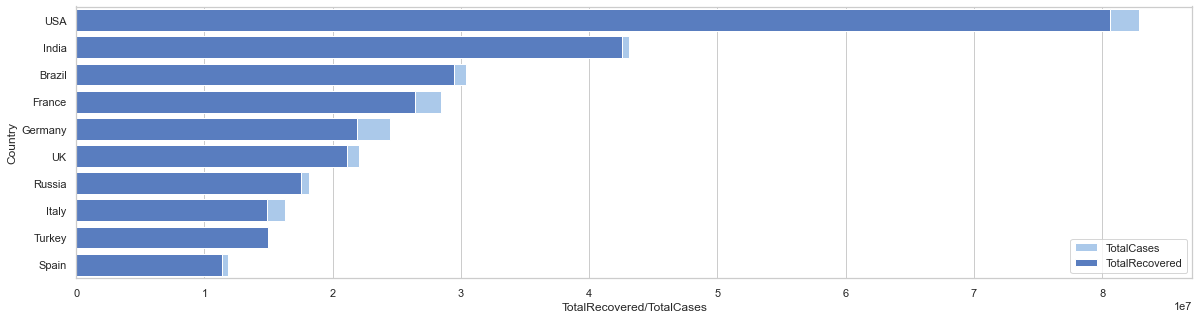

In [62]:
f, ax = plt.subplots(figsize=(20, 5))

n=10

sns.set_color_codes("pastel")
sns.barplot(x="TotalCases", y="Country", data=df[:n], label="TotalCases", color="b")

sns.set_color_codes("muted")
sns.barplot(x="TotalRecovered", y="Country", data=df[:n], label="TotalRecovered", color="b")

plt.xlabel("TotalRecovered/TotalCases")

plt.legend()

# Cause effect : May test have relationship to cases
Để công bằng ta quy đồng số lượng test và số lượng cases trên 1M dân số, nên ta trực quan trên 2 trường dữ liệu là Tests/ 1M pop, Tot Cases/1M pop 

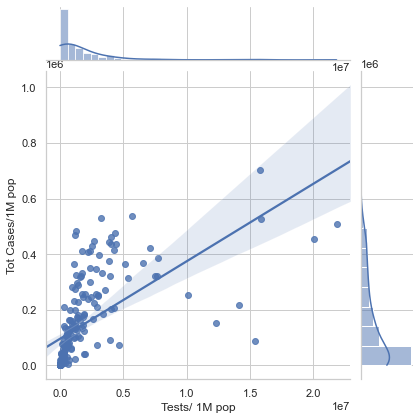

In [92]:
g = sns.jointplot(x="Tests/ 1M pop", y="Tot Cases/1M pop", data=df,  kind="reg", truncate=False)